<a href="https://colab.research.google.com/github/uveysturhan/condensed-matter-related/blob/main/Harper_Equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

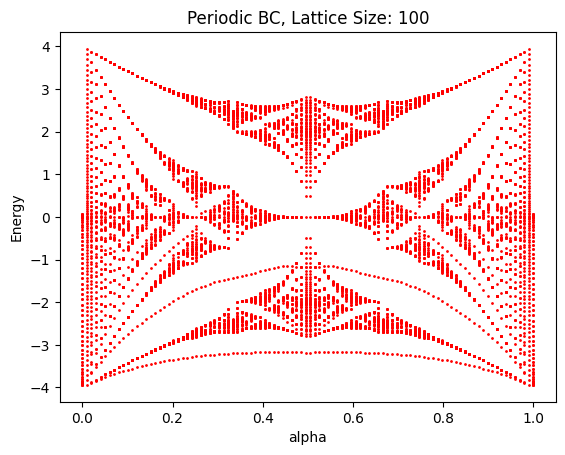

In [74]:
import numpy as np
import matplotlib.pyplot as plt

def find_harper_hamiltonian(N, alpha, k1, k2, a=1.0, t=1.0):
    H = np.zeros((N, N), dtype=np.complex128)
    for r in range(N):
        H[r, r] = -2.0*t * np.cos(k1*a + 2.0*np.pi*alpha*r)
        r_plus = (r + 1) % N
        H[r, r_plus] += -t #* np.exp(1j * k2 * a)
        H[r_plus, r] += -t #* np.exp(-1j * k2 *a)

    return H
N_1=100
k1=2.0 * np.pi / 25
k2=2.0 * np.pi /25
def show_butterfly():
    alphas_o = []
    energies_o = []
    alpha_list=np.linspace(0,1,100)
    for alpha in alpha_list:
          Hp = find_harper_hamiltonian(N_1, alpha, k1, k2, a=1.0, t=1.0)
          eigvals = np.linalg.eigvalsh(Hp)
          alphas_o.extend([alpha]*len(eigvals))
          energies_o.extend(eigvals)

    plt.scatter(alphas_o, energies_o, s=1, c='red')
    plt.xlabel('alpha')
    plt.ylabel('Energy')
    plt.title(f'Periodic BC, Lattice Size: {N_1}')
    plt.show()

show_butterfly()
